# 1.Tổng quan bài toán

### Smoke Detection Dataset
Detect smoke with the help of IOT data and trigger a fire alarm.

- Problem Type : Binary Classification
- Target Variable : Fire Alarm
- Source: [Kaggle](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset)

## 1.1 Load các package cần thiết


In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## 1.2 Load tập dữ liệu

In [128]:
data = pd.read_csv('smoke_detection_iot.csv')

# 2.Khai phá dữ liệu

## 2.1 Tổng quan dữ liệu

In [129]:
data.shape

(62630, 16)

- In ra một vài mẫu dữ liệu

In [130]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [131]:
data.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


- In ra tên của các đặc trưng

In [132]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

- Xem tóm tắt một số đặc điểm về tập dữ liệu

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


- Xem các thuộc tính thống kê của tập dữ liệu

In [134]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [135]:
# df.describe(include=['object'])

- Biến `Unnamed: 0` chỉ đơn giản là số thứ tự
- Biến `UTC` cũng được mô tả là thời gian để đánh dấu phân biệt giữa các kết quả đo 

do đó có thể remove 2 biến này ra khỏi data 

In [136]:
data.drop(['Unnamed: 0', 'UTC'], axis=1, inplace=True)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


## 2.2 Phân tích đơn biến

Đặc trưng muốn dự đoán là `Fire Alarm`

- Kiểm tra giá trị khuyết

In [137]:
data['Fire Alarm'].isnull().sum()

0

- Kểm tra số lượng nhãn của đặc trưng

In [138]:
data['Fire Alarm'].nunique()

2

In [139]:
data['Fire Alarm'].unique()

array([0, 1])

- Xem phân phối tần suất của các giá trị

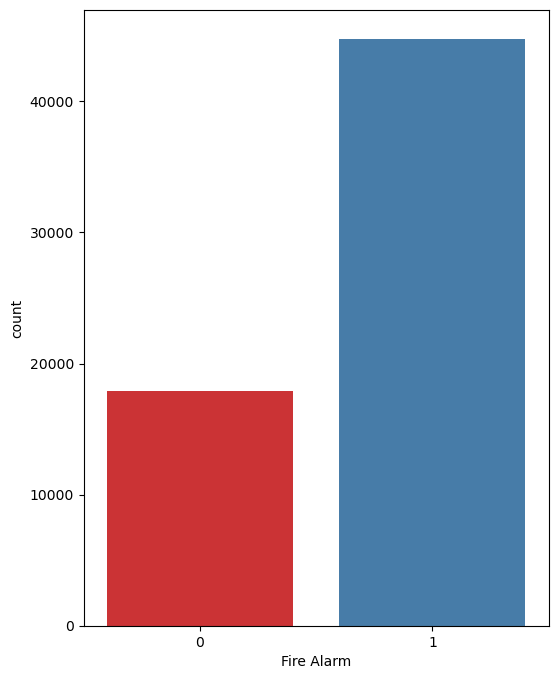

In [140]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x='Fire Alarm', data=data, palette="Set1")
plt.show()

In [141]:
data['Fire Alarm'].value_counts()/len(data)

1    0.714626
0    0.285374
Name: Fire Alarm, dtype: float64

Dữ liệu khá mất cân bằng, sẽ thử thêm một số phương pháp resample 

## 2.3 Phân tích song biến

### 2.3.1 Khám phá các biến hạng mục

In [142]:
categorycal = [col for col in data.columns if data[col].dtype == 'object']
categorycal

[]

- Kiểm tra các giá trị bị khuyết

In [143]:
# cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
# print(df[cat1].isnull().sum())

- Số lượng nhãn trong từng biến hạng mục

In [144]:
# for var in categorical:
#     print(var, ' chứa ', len(df[var].unique()), ' nhãn')

- Đếm tần suất của các biến hạng mục (do biến 'Date chứa quá nhiều nhãn nên chúng ta vẽ bỏ qua biến này trong việc vẽ đồ thị tần suất)

In [145]:
# vẽ đồ thị cột biễu diễn tỉ lệ tần suất các nhãn của từng biến hạng mục
# for var in set(categorical) - {'Date'}: 
#     f, ax = plt.subplots(figsize=(16, 8))
#     data_plot = df[var].value_counts()/np.float(len(df[var]))
#     ax = data_plot.plot(kind='bar')
#     ax.legend()
#     plt.show()

### 2.3.2 Khám phá các biến giá trị số

In [146]:
numberical = [col for col in data.columns if data[col].dtype != 'object']
numberical

['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'eCO2[ppm]',
 'Raw H2',
 'Raw Ethanol',
 'Pressure[hPa]',
 'PM1.0',
 'PM2.5',
 'NC0.5',
 'NC1.0',
 'NC2.5',
 'CNT',
 'Fire Alarm']

- kiểm tra các giá trị bị khuyết́

In [147]:
data.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [148]:
# df[numerical].describe()

- Tìm các dữ liệu ngoại lai

In [149]:
for col in data.columns:
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lower = data[col].quantile(0.25) - 3*IQR
    upper = data[col].quantile(0.75) + 3*IQR
    print(col, ' có ', len(data[(data[col] < lower) | (data[col] > upper)]), ' outliers')

Temperature[C]  có  0  outliers
Humidity[%]  có  3746  outliers
TVOC[ppb]  có  2209  outliers
eCO2[ppm]  có  9346  outliers
Raw H2  có  914  outliers
Raw Ethanol  có  770  outliers
Pressure[hPa]  có  1154  outliers
PM1.0  có  1550  outliers
PM2.5  có  1550  outliers
NC0.5  có  1548  outliers
NC1.0  có  1550  outliers
NC2.5  có  1782  outliers
CNT  có  0  outliers
Fire Alarm  có  0  outliers


=> Cần xử lý ngoại lai

## 2.4 Phân tích đa biến

- Vễ bản đồ nhiệt (heat map) của ma trận tương quan

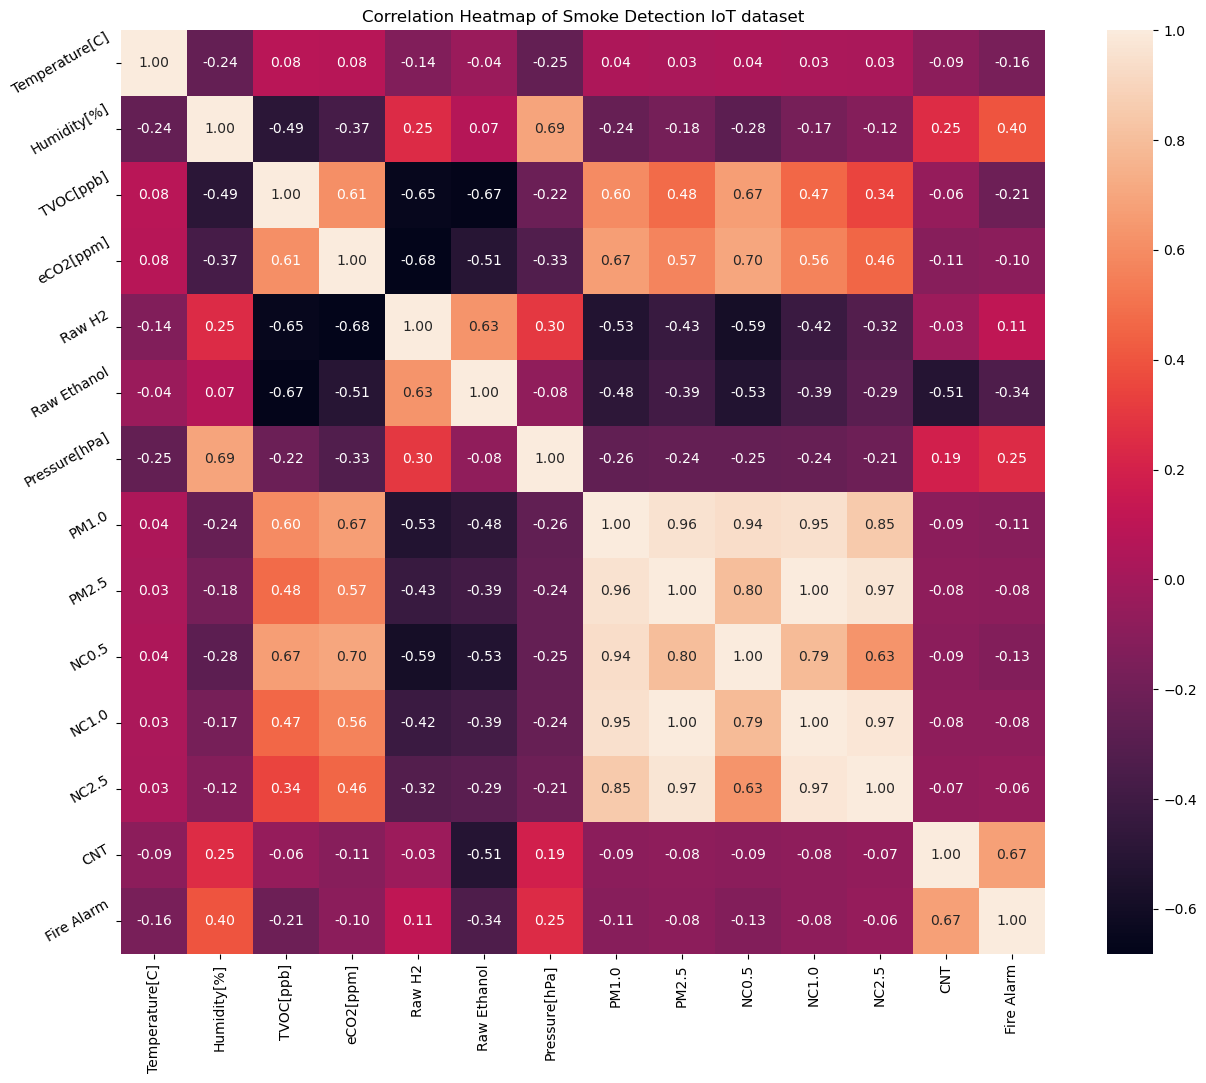

In [150]:
correlation = data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Smoke Detection IoT dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

- Thể hiện rõ hơn mối quan hệ tương quan của các biến có mức độ tương quan mạnh

In [151]:
# num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']
# sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()


# 3.Tiền xử lý dữ liệu

Chúng ta sẽ tiến hành làm sạch dữ liệu trước khi chúng ta huấn luyện mô hình. Ở bước này chúng ta sẽ:

1. Điền giá trị vào các đặc trưng bị khuyết
2. Loại bỏ các ngoại lai
3. Mã hóa các đặc trưng tùy vào loại biến

- Chuẩn bị tập dữ liệu

In [152]:
# X = df.drop(['RainTomorrow'], axis=1)
# y = df['RainTomorrow']
X = data.drop(['Fire Alarm'], axis=1)
y = data['Fire Alarm']

- Chia biến hạng mục và biến giá trị số

In [153]:
# categorical = [col for col in X.columns if X[col].dtypes == 'O']
# numerical = [col for col in X.columns if X[col].dtypes != 'O']

- Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50104, 13), (50104,), (12526, 13), (12526,))

## 3.1 Xử lý đặc trưng bị khuyết

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#1110-automatic-selection-of-best-imputation-technique-with-sklearn)

In [155]:
# NA

## 3.2 Xử lý ngoại lai của biến giá trị số

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#12-outliers)

In [156]:
from feature_engine.outliers import Winsorizer

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3)
winsorizer.fit(X_train)
X_train = winsorizer.transform(X_train)
X_test = winsorizer.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50104, 13), (50104,), (12526, 13), (12526,))

## 3.3 Mã hóa các biến hạng mục

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#13-categories-encoding)

In [157]:
# import category_encoders as ce
# encoder = ce.BinaryEncoder(cols=['RainToday'])
# hai biến bổ sung ```RainToday_0``` và ```RainToday_1``` được tạo từ biến RainToday.

## 3.4 Rời rạc hóa dữ liệu giá trị số

In [158]:
# from feature_engine.discretisation import EqualFrequencyDiscretiser
# disc = EqualFrequencyDiscretiser(q=10, variables = numerical)
# disc.fit(X_train[numerical])

## 3.5 Feature Scaling

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#15-feature-scaling)

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50104, 13), (50104,), (12526, 13), (12526,))

# 4.Lựa chọn đặc trưng

[Reference](https://ngohongthai.github.io/funix/contents/1-feature-engineering.html#17-features-selection)

## 4.1 Loại các đặc trưng bị trùng

- Đầu tiên là chúng ta sẽ loại bỏ các đặc trưng bị trùng

In [160]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(selection_method='variance')),
])

pipe.fit(X_train, y_train)
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50104, 9), (50104,), (12526, 9), (12526,))

**Note**: Do số lượng đặc trưng đã rất nhỏ nên không cần phải lựa chọn đặc trưng

# 5.Huấn luyện mô hình

## 5.1 Lấy mẫu dữ liệu

- Under-sampling

- Over-sampling

- Kết hợp 2 phương pháp under và over-sampling

[Reference](https://ngohongthai.github.io/funix/contents/3-imbalanced-data.html)

- **Under-sampling**

In [161]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks, AllKNN

undersampler_dict = {
    
    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=0,
        replacement=False),
    
    'tomek': TomekLinks(
        sampling_strategy='auto',
        n_jobs=4),
    
    'enn': EditedNearestNeighbours(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4),
    
    'allknn': AllKNN(
        sampling_strategy='auto',
        n_neighbors=3,
        kind_sel='all',
        n_jobs=4)
}

- **Over-sampling**

In [162]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.svm import SVC

oversampler_dict = {
    
    'smote': SMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',
        random_state=0,
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',
        random_state=0,
        n_neighbors=5,
        n_jobs=4),
}

- **Over-sampling and Over-sampling**

In [163]:
from imblearn.combine import SMOTEENN, SMOTETomek

under_oversampler_dict = {
    
    'smenn': SMOTEENN(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        enn=EditedNearestNeighbours(
            sampling_strategy='auto', n_neighbors=3, kind_sel='all'),
        n_jobs=4),

    'smtomek': SMOTETomek(
        sampling_strategy='auto',
        random_state=0,
        smote=SMOTE(sampling_strategy='auto', random_state=0, k_neighbors=5),
        tomek=TomekLinks(sampling_strategy='all'),
        n_jobs=4),
    
}

In [164]:
resampled_data = {
    'un_resample_data': (X_train, y_train),
}

for resampler in undersampler_dict:
    X_resampled, y_resampled = undersampler_dict[resampler].fit_resample(X_train, y_train)
    resampled_data[resampler] = (X_resampled, y_resampled)

for resampler in oversampler_dict:
    X_resampled, y_resampled = oversampler_dict[resampler].fit_resample(X_train, y_train)
    resampled_data[resampler] = (X_resampled, y_resampled)
    
for resampler in under_oversampler_dict:
    X_resampled, y_resampled = under_oversampler_dict[resampler].fit_resample(X_train, y_train)
    resampled_data[resampler] = (X_resampled, y_resampled)


## 5.2 Huấn luyện mô hình

[Reference](https://ngohongthai.github.io/funix/contents/3-imbalanced-data.html#4-ensemble-learning)

In [165]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

models_dict = {
    'random_forest': RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=4),
    'adaboost_classifier': AdaBoostClassifier(),
    'gradientboost_classifier': GradientBoostingClassifier(),
    'xgboost_classifier': XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, 
                     learning_rate=0.03, nthread=4, subsample=0.95, 
                     colsample_bytree=0.85, seed=0),
}


In [166]:
from sklearn.metrics import roc_auc_score
for resampled_method, data in resampled_data.items():
    for model_name, model in models_dict.items():
        model.fit(data[0], data[1])
        y_pred = model.predict(X_test)
        score = roc_auc_score(y_test, y_pred)
        print(f'{resampled_method} - {model_name}: {score}')

un_resample_data - random_forest: 0.999943952471696
un_resample_data - adaboost_classifier: 0.999887904943392
un_resample_data - gradientboost_classifier: 0.999943952471696
[09:37:19] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
un_resample_data - xgboost_classifier: 1.0
random - random_forest: 0.999887904943392
random - adaboost_classifier: 0.999887904943392
random - gradientboost_classifier: 0.999887904943392
[09:37:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'l

# 6.Save & Load mô hình

- Chúng ta sẽ sử dụng thư viện [joblib](https://joblib.readthedocs.io/en/latest/) để save và load mô hình, ngoài ra chúng ta còn có thể sử dụng thư viện [pickle](https://docs.python.org/2/library/pickle.html).

In [167]:
from joblib import dump, load

- Save mô hình

In [168]:
# clf = MLPClassifier(hidden_layer_sizes=(100, 50, ), max_iter=300)
# clf.fit(train, y_train)
# dump(clf, 'nn_model.joblib')

- Load mô hình

In [169]:
# clf_nn = load('nn_model.joblib')
# clf_nn